Facultad de Ingeniería UACH

Maestría en Ingeniería en Computación

Materia: Machine Learning

Alumno: Iván Avena Caro

Matricula: 193650

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.inspection import permutation_importance

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
import json
import random
from sklearn.pipeline import Pipeline
import pickle
import joblib

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
sns.set()

In [4]:
data = pd.read_csv('/content/estudiantes - copia (6).csv')

In [5]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
#obtener vista de todas las claves
data.keys()

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [8]:
#Cambiar nacionality por Nationality y Age at enrollment por Age
data.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

In [9]:
#Revisar tipo de dato
print(data.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nationality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age           

In [10]:
#Analizar valores únicos
for col in data.columns:
    print(f"{col}: {data[col].nunique()} valores únicos")

Marital status: 6 valores únicos
Application mode: 18 valores únicos
Application order: 8 valores únicos
Course: 17 valores únicos
Daytime/evening attendance: 2 valores únicos
Previous qualification: 17 valores únicos
Nationality: 21 valores únicos
Mother's qualification: 29 valores únicos
Father's qualification: 34 valores únicos
Mother's occupation: 32 valores únicos
Father's occupation: 46 valores únicos
Displaced: 2 valores únicos
Educational special needs: 2 valores únicos
Debtor: 2 valores únicos
Tuition fees up to date: 2 valores únicos
Gender: 2 valores únicos
Scholarship holder: 2 valores únicos
Age: 46 valores únicos
International: 2 valores únicos
Curricular units 1st sem (credited): 21 valores únicos
Curricular units 1st sem (enrolled): 23 valores únicos
Curricular units 1st sem (evaluations): 35 valores únicos
Curricular units 1st sem (approved): 23 valores únicos
Curricular units 1st sem (grade): 805 valores únicos
Curricular units 1st sem (without evaluations): 11 valore

In [11]:
# Mostrar nombres originales de columnas
print("Nombres originales de columnas:")
print(data.columns)

# Reemplazar apóstrofos en nombres de columnas
data.columns = data.columns.str.replace("'", "")

# Mostrar nombres de columnas después de la modificación
print("\nNombres de columnas después de eliminar apóstrofos:")
print(data.columns)

Nombres originales de columnas:
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (wi

In [12]:
# Verificar si hay registros duplicados
duplicados = data.duplicated()
print(data[duplicados])

Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance, Previous qualification, Nationality, Mothers qualification, Fathers qualification, Mothers occupation, Fathers occupation, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x 35 columns]


In [13]:
#Comprobación de la existencia de valores infinitos
is_inf = data.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

,0


In [14]:
#Comprobación si existen valore nulos
is_null = data.isna().any()
is_null[is_null]

,0


In [15]:
#Manejo de espacios
data.columns = data.columns.str.strip()

In [16]:
# Verificar si hay valores faltantes en las columnas numéricas
# Seleccionar las columnas numéricas automáticamente
numerical_columns = data.select_dtypes(include=['number']).columns

# Verificar si hay valores faltantes en las columnas numéricas
print(data[numerical_columns].isna().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mothers qualification                             0
Fathers qualification                             0
Mothers occupation                                0
Fathers occupation                                0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age                                               0
International                                     0
Curricular u

In [17]:
# Verificar las columnas numéricas
numeric_columns = data.select_dtypes(include='number').columns
print(f"Columnas numéricas: {numeric_columns}")

# Verificar las columnas categóricas
categorical_columns = data.select_dtypes(exclude='number').columns
print(f"Columnas categóricas: {categorical_columns}")

Columnas numéricas: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age', 'International', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'U

In [18]:
#Columna target
data["Target"]

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate
...,...
4419,Graduate
4420,Dropout
4421,Dropout
4422,Graduate


In [19]:
# Contar las ocurrencias de cada categoría en la columna 'Target'
target_count = data['Target'].value_counts().reset_index()

# Renombrar las columnas para que se ajusten a los nombres de 'Target' y 'Count_T'
target_count.columns = ['Target', 'Count_T']

# Crear el gráfico de pastel con Plotly Express
fig = px.pie(target_count,
             names='Target',
             values='Count_T',
             title='Distribución de la Columna Target')

# Personalizar el gráfico:
# Cambiar las etiquetas, hacer un agujero (donut chart) y ajustar la proporción de los segmentos
fig.update_traces(labels=['Graduate', 'Dropout', 'Enrolled'],
                  hole=0.4,
                  textinfo='value+label',
                  pull=[0, 0.2, 0.1])

# Mostrar el gráfico
fig.show()

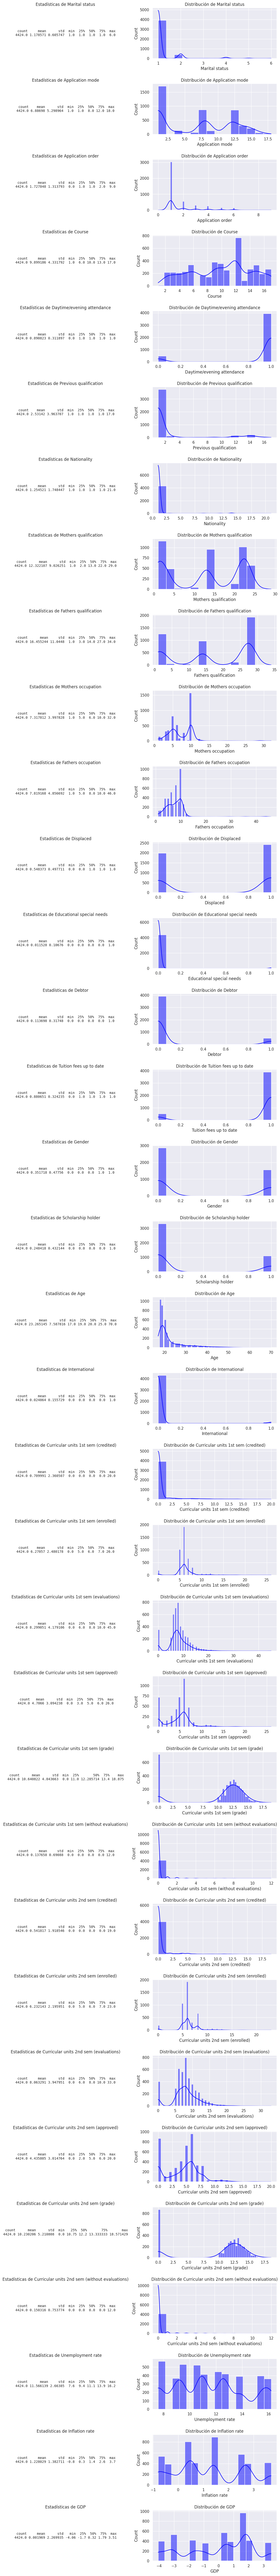

In [20]:
#Estadisticas descriptivas
# Seleccionar solo las columnas numéricas
data_numerica = data.select_dtypes(include=['number'])

# Calcular estadísticas descriptivas
estadisticas = data_numerica.describe()

# Crear una figura para la tabla de estadísticas y gráficos
fig, axarr = plt.subplots(nrows=len(data_numerica.columns), ncols=2, figsize=(14, len(data_numerica.columns) * 4))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.5)  # Ajustar el espacio entre las subgráficas

for i, columna in enumerate(data_numerica.columns):
    # Graficar la distribución
    sns.histplot(data_numerica[columna], ax=axarr[i, 1], kde=True, color='blue')
    axarr[i, 1].set_title(f'Distribución de {columna}')

    # Mostrar estadísticas descriptivas en la primera columna
    estadisticas_texto = estadisticas[[columna]].T.to_string(index=False)
    axarr[i, 0].text(0.5, 0.5, estadisticas_texto, fontsize=10, ha='center', va='center', family='monospace')
    axarr[i, 0].set_title(f'Estadísticas de {columna}')
    axarr[i, 0].axis('off')  # Desactivar los ejes para que solo se vea el texto

plt.show()

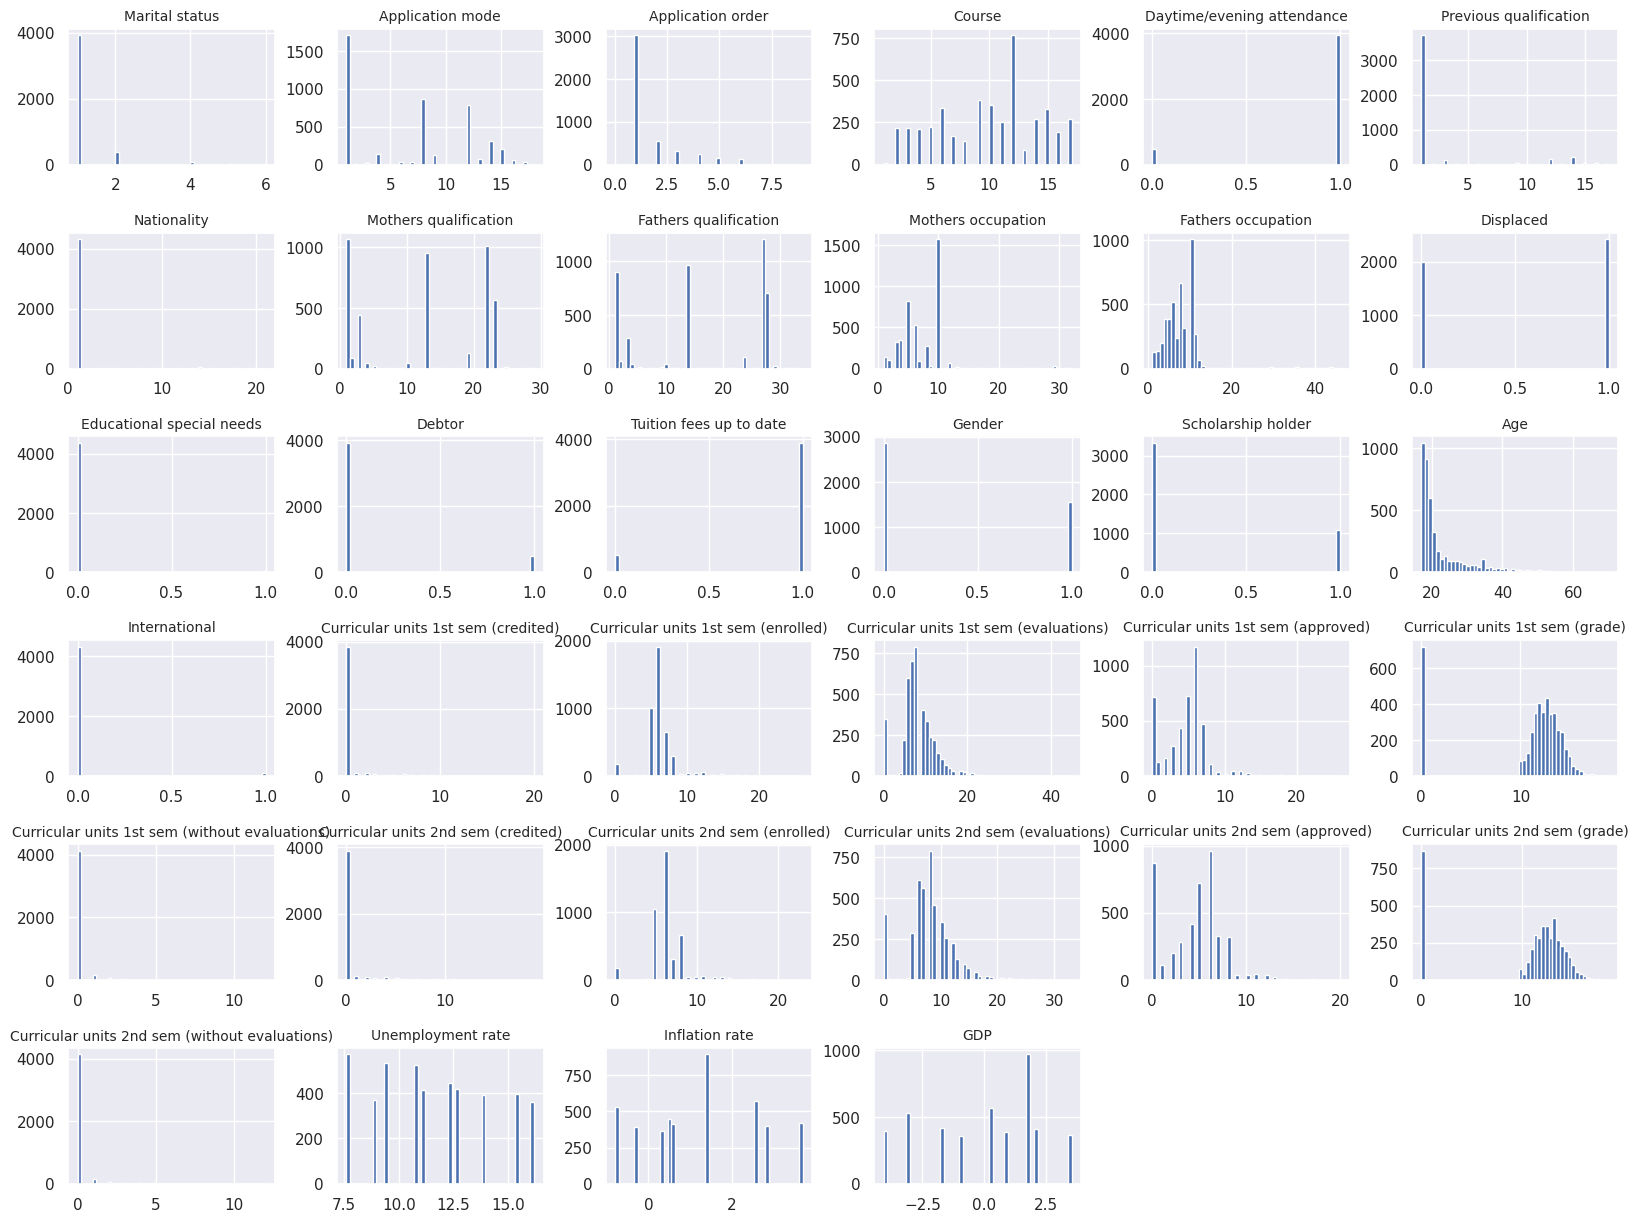

In [21]:
#Histogramas individuales
data.hist(bins=50, figsize=(20, 15))

# Ajustar el tamaño de la letra de los ejes y el título
plt.tick_params(axis='both', labelsize=8)  # Cambia el tamaño de las etiquetas de los ejes
plt.subplots_adjust(hspace=0.5)  # Ajusta el espacio entre los subgráficos si es necesario

# Puedes también ajustar el título de cada subgráfico si lo necesitas
for ax in plt.gcf().axes:  # Recorrer cada uno de los subgráficos
    ax.set_title(ax.get_title(), fontsize=10)  # Cambiar tamaño del título de cada gráfico

# Mostrar el gráfico
plt.show()

In [22]:
# Identificar outliers para una columna (usando mediana y desviación estándar)
def imputar_outliers_mediana(df, columna, umbral=3):
    media = df[columna].median()  # Usamos la mediana en lugar de la media
    desviacion_estandar = df[columna].std()
    limite_superior = media + umbral * desviacion_estandar
    limite_inferior = media - umbral * desviacion_estandar
    outliers = df[(df[columna] > limite_superior) | (df[columna] < limite_inferior)]

    # Reemplazar los outliers con la mediana
    df[columna] = df[columna].apply(lambda x: media if (x > limite_superior or x < limite_inferior) else x)
    return df

# Aplicar a cada columna numérica
numerical_columns = ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
                     'Unemployment rate', 'Inflation rate', 'GDP']

for col in numerical_columns:
    data = imputar_outliers_mediana(data, col)

In [23]:
# Ver el conteo de los valores de la columna 'Gender'
gender_counts = data['Gender'].value_counts()

# Mostrar el resultado
print(gender_counts)

Gender
0    2868
1    1556
Name: count, dtype: int64


In [24]:
# Gráfico de barras de la tasa de deserción por género
# Asegúrate de que 'Target' esté como una variable categórica
data['Target'] = data['Target'].astype('category')

# Calcular los conteos por género y target
gender_target_counts = data.groupby(['Gender', 'Target']).size().unstack(fill_value=0)

# Normalizar los conteos por género para obtener proporciones
gender_target_proportions = gender_target_counts.divide(gender_target_counts.sum(axis=1), axis=0)

# Restablecer el índice para que 'Gender' sea una columna normal (no índice)
gender_target_proportions = gender_target_proportions.reset_index()

# Reestructurar el DataFrame para 'plotly.express'
gender_target_melted = gender_target_proportions.melt(id_vars=['Gender'], value_vars=gender_target_proportions.columns[1:],
                                                     var_name='Target', value_name='Proporción')

# Crear el gráfico de barras apiladas
fig = px.bar(gender_target_melted,
             x="Gender",  # El eje X será 'Gender' (0 para Mujer, 1 para Hombre)
             y="Proporción",  # Las proporciones de deserción
             color="Target",  # Usamos 'Target' para el color
             title="Distribución de la Tasa de Deserción por Género",
             labels={"Gender": "Género", "Proporción": "Proporción", "Target": "Deserción"},
             barmode='stack',  # Apilamos las barras
             category_orders={"Gender": [0, 1]},  # Aseguramos que el eje X tenga el orden correcto (0 para Mujer y 1 para Hombre)
             color_discrete_map={"Dropout": "lightcoral", "Enrolled": "lightblue", "Graduate": "lightgreen"}  # Colores personalizados
            )

# Personalizar el diseño del gráfico
fig.update_layout(
    title="Distribución de la Tasa de Deserción por Género",
    xaxis_title="Género",
    yaxis_title="Proporción",
    legend_title="Deserción",
    xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=["Mujer", "Hombre"]),  # Etiquetas personalizadas para los géneros
    template="plotly_white",  # Estilo de fondo blanco
    margin=dict(l=40, r=40, t=40, b=40),  # Ajustar márgenes
)

# Mostrar el gráfico
fig.show()

<ipython-input-24-adbfa6d4ce32>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [25]:
# Gráfico de barras de la tasa de deserción por curso
# Asegúrate de que 'Target' esté como una variable categórica
data['Target'] = data['Target'].astype('category')

# Lista de los nombres de los cursos (puedes agregar más si es necesario)
course_names = [
    "Biofuel Production Technologies", "Animation and Multimedia Design", "Social Service (evening attendance)",
    "Agronomy", "Communication Design", "Veterinary Nursing", "Informatics Engineering", "Equinculture",
    "Management", "Social Service", "Tourism", "Nursing", "Oral Hygiene", "Advertising and Marketing Management",
    "Journalism and Communication", "Basic Education", "Management (evening attendance)"
]

# Calcular los conteos por curso y target
course_target_counts = data.groupby(['Course', 'Target']).size().unstack(fill_value=0)

# Normalizar los conteos por curso para obtener proporciones
course_target_proportions = course_target_counts.divide(course_target_counts.sum(axis=1), axis=0)

# Restablecer el índice para que 'Course' sea una columna normal (no índice)
course_target_proportions = course_target_proportions.reset_index()

# Reestructurar el DataFrame para Plotly Express
course_target_melted = course_target_proportions.melt(id_vars=['Course'], value_vars=course_target_proportions.columns[1:],
                                                     var_name='Target', value_name='Proporción')

# Crear el gráfico de barras apiladas
fig = px.bar(course_target_melted,
             x="Course",  # El eje X será 'Course'
             y="Proporción",  # Las proporciones de deserción
             color="Target",  # Usamos 'Target' para el color
             title="Distribución de la Tasa de Deserción por Curso",
             labels={"Course": "Curso", "Proporción": "Proporción", "Target": "Deserción"},
             barmode='stack',  # Apilamos las barras
             color_discrete_map={"Dropout": "lightcoral", "Enrolled": "lightblue", "Graduate": "lightgreen"}  # Colores personalizados
            )

# Personalizar el diseño del gráfico
fig.update_layout(
    title="Distribución de la Tasa de Deserción por Curso",
    xaxis_title="Curso",
    yaxis_title="Proporción",
    legend_title="Deserción",
    template="plotly_white",  # Estilo de fondo blanco
    margin=dict(l=40, r=40, t=40, b=80),  # Ajustar márgenes (el margen inferior es más grande para los nombres largos)
    xaxis=dict(
        tickmode='array',
        tickvals=course_target_proportions['Course'],  # Usar los valores del curso como tickvals
        ticktext=course_names,  # Los nombres de los cursos como texto en el eje X
        tickangle=-45  # Rotar las etiquetas para que sean legibles
    )
)

# Mostrar el gráfico
fig.show()

<ipython-input-25-f0fddf79d646>:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [26]:
# Histograma de la edad
# Crear el histograma con Plotly
fig = px.histogram(data, x='Age',
                   nbins=20,  # Número de bins o barras en el histograma
                   title="Distribución de la Edad",
                   labels={'Age': 'Edad'},  # Etiqueta para el eje X
                   color_discrete_sequence=['lightblue'],  # Color de las barras
                   template="plotly_white")  # Estilo de fondo blanco

# Mostrar el gráfico
fig.show()

In [27]:
# Histograma de las unidades curriculares aprobadas en el primer semestre
# Crear el histograma con Plotly
fig = px.histogram(data,
                   x='Curricular units 1st sem (approved)',  # Especificar la columna correspondiente
                   nbins=20,  # Ajustar el número de bins (barras) en el histograma
                   title="Distribución de Unidades Curriculares Aprobadas (1er Semestre)",
                   labels={'Curricular units 1st sem (approved)': 'Unidades Curriculares Aprobadas (1er Semestre)'},
                   color_discrete_sequence=['lightgreen'],  # Color de las barras
                   template="plotly_white")  # Estilo de fondo blanco

# Mostrar el gráfico
fig.show()

In [28]:
# Boxplot de la edad al momento de inscripción por deserción
# Asegúrate de que 'Target' esté como variable categórica
data['Target'] = data['Target'].astype('category')

# Crear el boxplot con Plotly
fig = px.box(data,
             x='Target',  # Deserción en el eje X
             y='Age',  # Edad al momento de inscripción en el eje Y
             color='Target',  # Color según la deserción
             title="Boxplot de la Edad - Target",
             labels={'Target': 'Deserción', 'Age at enrollment': 'Edad al Momento de Inscripción'},
             color_discrete_map={'No': 'lightblue', 'Yes': 'lightcoral'},  # Asignar colores
             category_orders={'Target': ['No', 'Yes']})  # Asegura el orden correcto para deserción

# Mostrar el gráfico
fig.show()

In [29]:
# Crear la tabla de genero con las categorías de 'Target'
contingency_table = pd.crosstab(data['Gender'], data['Target'])

# Reemplazar los valores del índice (Gender) de 0 a 'Mujer' y de 1 a 'Hombre' usando map
contingency_table.index = contingency_table.index.map({0: 'Mujer', 1: 'Hombre'})

# Inspeccionamos cómo es la tabla de contingencia
print(contingency_table)

# Crear la tabla visual con Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=['Género', 'Dropout', 'Graduate', 'Enrolled'], fill_color='paleturquoise', align='center'),
    cells=dict(values=[contingency_table.index,
                       contingency_table['Dropout'],
                       contingency_table['Graduate'],
                       contingency_table['Enrolled']],
               fill_color='lavender', align='center'))
])

# Actualizar el título y mostrar el gráfico
fig.update_layout(title='Género-target')

# Mostrar la tabla
fig.show()

Target  Dropout  Enrolled  Graduate
Gender                             
Mujer       720       487      1661
Hombre      701       307       548


In [30]:
# Lista de nombres de cursos
course_names = [
    "Biofuel Production Technologies", "Animation and Multimedia Design", "Social Service (evening attendance)",
    "Agronomy", "Communication Design", "Veterinary Nursing", "Informatics Engineering", "Equinculture",
    "Management", "Social Service", "Tourism", "Nursing", "Oral Hygiene", "Advertising and Marketing Management",
    "Journalism and Communication", "Basic Education", "Management (evening attendance)"
]

# Crear un diccionario de mapeo (puedes ajustar si el número de cursos es mayor)
course_dict = dict(zip(data['Course'].unique(), course_names))

# Crear una columna temporal para almacenar los nombres de los cursos
data['Course_temp'] = data['Course'].map(course_dict)

# Crear la tabla de contingencia entre 'Course_temp' y 'Target'
contingency_table_course = pd.crosstab(data['Course_temp'], data['Target'])

# Inspeccionar la tabla de contingencia
print(contingency_table_course)

# Reemplazar las categorías de 'Target' para hacerlo más legible en la tabla visual
contingency_table_course.columns = contingency_table_course.columns.map({
    'Dropout': 'Deserción',
    'Graduate': 'Graduado',
    'Enrolled': 'Inscrito'
})

# Crear la tabla visual con Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=['Curso', 'Deserción', 'Graduado', 'Inscrito'],
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[contingency_table_course.index,
                       contingency_table_course['Deserción'],
                       contingency_table_course['Graduado'],
                       contingency_table_course['Inscrito']],
               fill_color='lavender',
               align='center'))
])

# Actualizar el título y mostrar el gráfico
fig.update_layout(title='Curso-Target')

# Mostrar la tabla
fig.show()

Target                                Dropout  Enrolled  Graduate
Course_temp                                                      
Advertising and Marketing Management      134       108       138
Agronomy                                  101        34       196
Animation and Multimedia Design            96        41       115
Basic Education                             8         3         1
Biofuel Production Technologies            82        37        96
Communication Design                       71        21       123
Equinculture                               65        42       248
Informatics Engineering                   118       100       548
Journalism and Communication               86        37        87
Management                                 95        48       125
Management (evening attendance)            92        64        14
Nursing                                    78        21        42
Oral Hygiene                               33        17        36
Social Ser

In [31]:
data = data.drop(columns=['Course_temp'])

In [32]:
# Crear gráficos de violín para cada columna respecto al 'Target'
columnas = [
    'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'
]

# Crear gráficos de violín para cada columna respecto al 'Target'
for columna in columnas:
    fig = px.violin(data, y=columna, color='Target', box=True,
                    title=f'Distribución de {columna} por Target',
                    labels={columna: columna, 'Target': 'Target'})

    # Mostrar el gráfico
    fig.show()

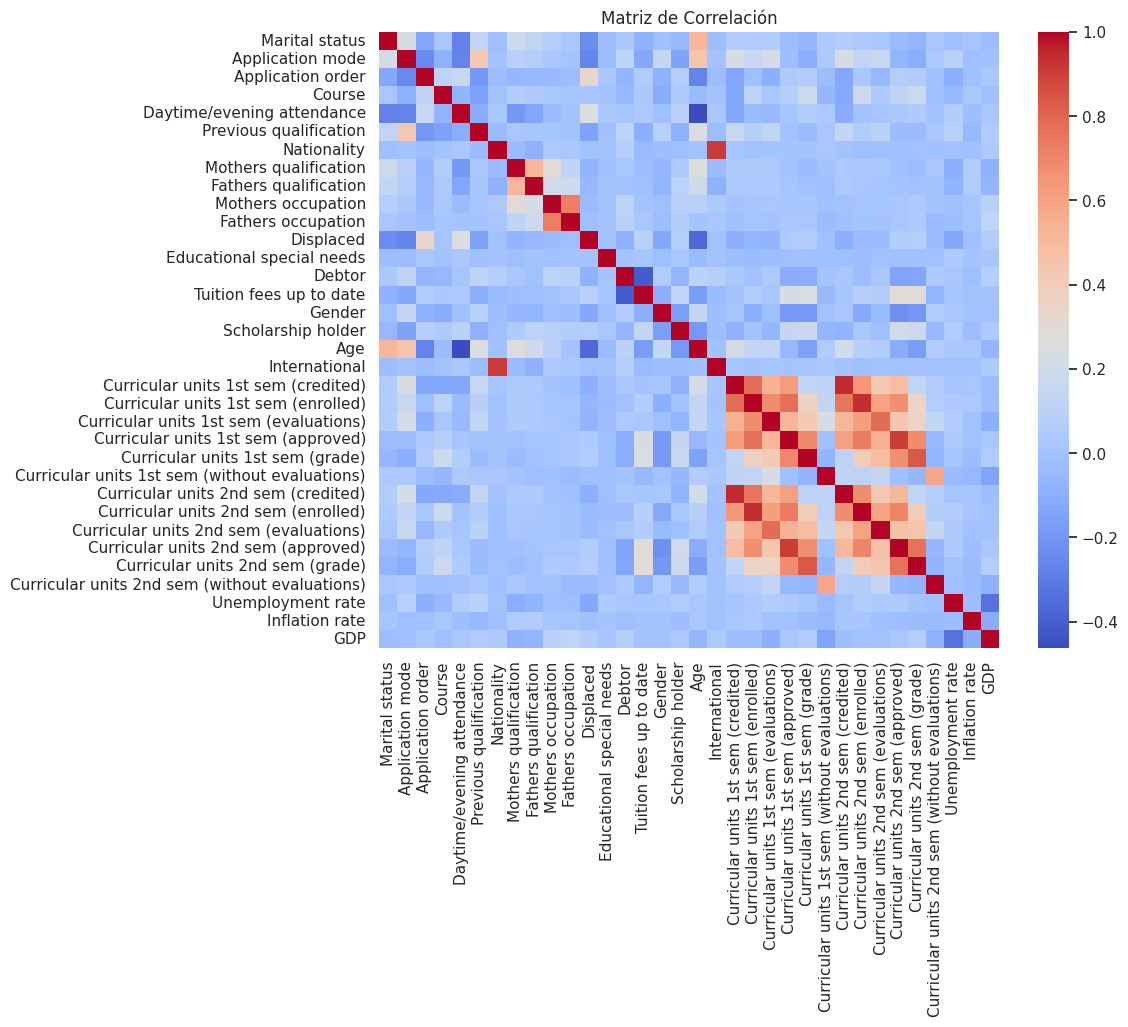

In [33]:
# Seleccionar solo columnas numéricas
numerical_data = data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr(method='pearson')

# Crear un DataFrame para almacenar pares de correlación
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Filtrar los pares con una correlación significativa
significant_pairs = correlation_pairs[(correlation_pairs['Correlation'] > 0.7) | (correlation_pairs['Correlation'] < -0.7)]

# Eliminar duplicados (por ejemplo, (A, B) y (B, A))
significant_pairs = significant_pairs[significant_pairs['Variable 1'] != significant_pairs['Variable 2']]
significant_pairs = significant_pairs.drop_duplicates(subset=['Correlation'], keep='first')

# Ordenar por valor de correlación
significant_pairs = significant_pairs.sort_values(by='Correlation', ascending=False)

# Crear el mapa de calor sin números
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

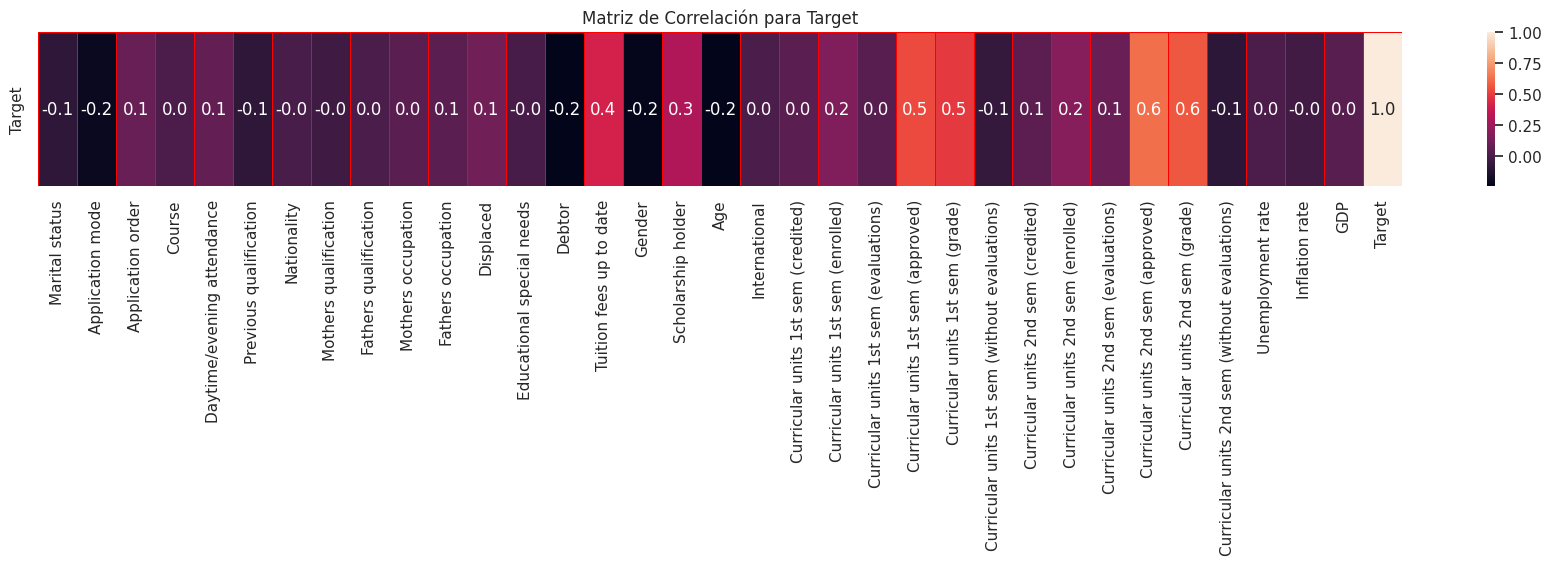

In [34]:
# Codificar la columna de Target a numérico
target = data["Target"]
enc = LabelEncoder()
data["Target"] = enc.fit_transform(target)  # Convierte 'Graduate', 'Enrolled', 'Dropout' a valores numéricos

# Seleccionar solo las columnas numéricas para evitar incluir columnas no numéricas como 'Course'
numerical_data = data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numerical_data.corr(method='pearson')

# Extraer solo la correlación con 'Target'
b = correlation_matrix.loc[["Target"], :]  # Extraer la matriz de correlación solo para 'Target'

# Visualizar la matriz de correlación
f, ax = plt.subplots(figsize=(22, 2))  # Ajusta el tamaño de la figura
sns.heatmap(b, annot=True, linewidths=0.5, linecolor="red", fmt='.1f', ax=ax)
plt.title('Matriz de Correlación para Target')
plt.show()

In [35]:
#correlación con el coeficiente de Pearson
# Seleccionar solo columnas numéricas
numerical_data = data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr(method='pearson')

# Crear un DataFrame para almacenar pares de correlación
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature', 'Colinear With', 'Pearson']

# Filtrar los pares con una correlación significativa (mayor a 0.7 o menor a -0.7)
significant_pairs = correlation_pairs[(correlation_pairs['Pearson'] > 0.7) | (correlation_pairs['Pearson'] < -0.7)]

# Eliminar duplicados (por ejemplo, (A, B) y (B, A))
significant_pairs = significant_pairs[significant_pairs['Feature'] != significant_pairs['Colinear With']]
significant_pairs = significant_pairs.drop_duplicates(subset=['Pearson'], keep='first')

# Ordenar por valor de correlación
significant_pairs = significant_pairs.sort_values(by='Pearson', ascending=False)

# Formatear y mostrar la tabla con encabezados en negrita
html_table = significant_pairs.to_html(index=False, escape=False)
html_table = html_table.replace('<table', '<table style="width: 100%;"')
html_table = html_table.replace('<th>', '<th style="font-weight: bold;">')
display(HTML(html_table))

Feature,Colinear With,Pearson
Curricular units 1st sem (credited),Curricular units 2nd sem (credited),0.944811
Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),0.942627
Nationality,International,0.911724
Curricular units 1st sem (approved),Curricular units 2nd sem (approved),0.904002
Curricular units 1st sem (grade),Curricular units 2nd sem (grade),0.837170
Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),0.778863
Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),0.774344
Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),0.769083
Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),0.760804
Curricular units 1st sem (enrolled),Curricular units 2nd sem (credited),0.753747


In [36]:
print(data.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age', 'International', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
 

In [37]:
# Definir las columnas a codificar con One-Hot Encoding (variables con pocos valores únicos)
ohe_columns = [
    'Daytime/evening attendance', 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
    'International'
]

# Comprobar si las columnas existen en el DataFrame
ohe_columns_existing = [col for col in ohe_columns if col in data.columns]

if ohe_columns_existing:
    # Aplicar One-Hot Encoding solo a las columnas existentes
    data = pd.get_dummies(data, columns=ohe_columns_existing, drop_first=True)
else:
    print("Ninguna de las columnas de ohe_columns existe en el DataFrame.")

# 2 Aplicar Label Encoding a variables con muchos valores únicos
le_columns = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Previous qualification', 'Nationality',
    "Mothers qualification", "Fathers qualification",
    "Mothers occupation", "Fathers occupation"
]

# Aplicar Label Encoding solo a las columnas que existen
label_encoder = LabelEncoder()
for col in le_columns:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])
    else:
        print(f"La columna '{col}' no se encuentra en el DataFrame.")

# Definir características y variable objetivo
X = data.drop(columns=['Target'], axis=1)
y = data['Target']

In [38]:
# Establecer la semilla para que los resultados sean consistentes
np.random.seed(42)
random.seed(42)

#Convertir las etiquetas de clase a números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#Dividir los datos en entrenamiento (70%) y validación (30%) con estratificación
X_temp, X_val, y_temp, y_val = train_test_split(X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)

#Verificar la distribución de clases en y_temp
print("Clases en y_temp:")
print(pd.Series(y_temp).value_counts())

Clases en y_temp:
2    1546
0     994
1     556
Name: count, dtype: int64


In [39]:
print(data.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Previous qualification', 'Nationality', 'Mothers qualification',
       'Fathers qualification', 'Mothers occupation', 'Fathers occupation',
       'Age', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target', 'Daytime/evening attendance_1',
       'Displaced_1', 'Educational special needs_1', 'Debtor_1',
       'Tuition fees up to date_1'

In [40]:
# Dividir el conjunto temporal en entrenamiento (70%) y prueba (30%) con estratificación
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.3, stratify=y_temp, random_state=42)

# **Random Forest**

In [41]:
# Aplicar SMOTE para balancear las clases sin escalar
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Aplicar ENN sobre los datos balanceados por SMOTE
enn = EditedNearestNeighbours()
X_smote_enn, y_smote_enn = enn.fit_resample(X_smote, y_smote)

# Verificar la distribución de clases después de SMOTE y ENN
print("Distribución de clases después de SMOTE y ENN:")
print(pd.Series(y_smote_enn).value_counts())

Distribución de clases después de SMOTE y ENN:
0    1082
1     768
2     376
Name: count, dtype: int64


Características ordenadas por importancia:
Curricular units 2nd sem (approved)               0.135526
Curricular units 2nd sem (grade)                  0.106522
Curricular units 1st sem (approved)               0.076133
Curricular units 1st sem (grade)                  0.073242
Curricular units 2nd sem (evaluations)            0.050339
Curricular units 1st sem (evaluations)            0.048386
Age                                               0.048246
Tuition fees up to date_1                         0.036463
Mothers occupation                                0.034731
Course                                            0.034232
Application mode                                  0.034196
Unemployment rate                                 0.033827
Inflation rate                                    0.033406
GDP                                               0.031299
Fathers occupation                                0.030737
Mothers qualification                             0.029910
Fathers quali

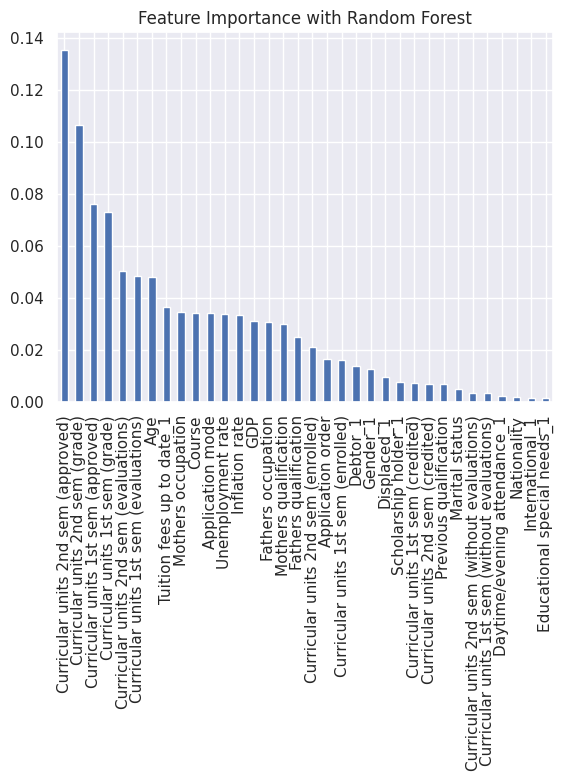

Características más importantes: ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 1st sem (evaluations)', 'Age', 'Tuition fees up to date_1', 'Mothers occupation', 'Course', 'Application mode', 'Unemployment rate', 'Inflation rate', 'GDP', 'Fathers occupation', 'Mothers qualification', 'Fathers qualification', 'Curricular units 2nd sem (enrolled)', 'Application order', 'Curricular units 1st sem (enrolled)', 'Debtor_1', 'Gender_1']
Tamaño de X_train_reduced: (2167, 22)
Tamaño de X_val_reduced: (1328, 22)
Tamaño de X_test_reduced: (929, 22)
Parámetros cargados desde el archivo:
{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

In [44]:
# Entrenar el modelo Random Forest con los datos balanceados (SMOTE + ENN) sin escalar
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_smote_enn, y_smote_enn)

# Obtener la importancia de características después de haber entrenado el modelo
rf_importance = rf_model.feature_importances_

# Crear un diccionario de características con sus respectivas importancias
feature_importances = {name: score for name, score in zip(X_smote_enn.columns, rf_importance)}

# Ordenar las características por su importancia en orden descendente
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

# Mostrar la lista de características ordenadas
print("Características ordenadas por importancia:")
print(feature_importances_sorted)

#Función para graficar la importancia de las características
def plot_feature_importance(importance, model_name, X_train):
    features = X_train.columns  # Asumiendo que X_train es un DataFrame
    feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)
    feature_importance.plot(kind='bar', title=f'Feature Importance with {model_name}')
    plt.show()

# Graficar la importancia de las características para Random Forest
plot_feature_importance(rf_importance, 'Random Forest', X_smote_enn)  # Usamos X_smote_enn para el gráfico

# Extraer las características más importantes con Random Forest
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

# Extraer las características más importantes
columns = list(feature_importances_sorted.head(22).index)  # Seleccionamos las 22 más importantes
print("Características más importantes:", columns)

# Seleccionar solo las 22 características más importantes en los conjuntos de entrenamiento, validación y prueba
X_train_reduced = X_train[columns].copy()
X_val_reduced = X_val[columns].copy()  # Verifica que X_val esté definido
X_test_reduced = X_test[columns].copy()  # También reducimos el conjunto de prueba

# Verificar el tamaño de los conjuntos después de la reducción de características
print(f"Tamaño de X_train_reduced: {X_train_reduced.shape}")
print(f"Tamaño de X_val_reduced: {X_val_reduced.shape}")
print(f"Tamaño de X_test_reduced: {X_test_reduced.shape}")

'''# Definir la búsqueda en cuadrícula para ajustar los hiperparámetros
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]  # Ajuste de peso para las clases desbalanceadas
}

# Crear GridSearchCV con validación cruzada (cv=10)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=10, n_jobs=-1, verbose=2, scoring='f1_weighted')

# Ajustar el modelo a los datos de entrenamiento
grid_search_rf.fit(X_train_reduced, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros para Random Forest:", grid_search_rf.best_params_)

# Guardar los mejores parámetros en un archivo .json
best_params_rf = grid_search_rf.best_params_
file_path_rf = "best_rf_params.json"
with open(file_path_rf, 'w') as json_file:
    json.dump(best_params_rf, json_file, indent=4)

print(f"Mejores parámetros guardados en {file_path_rf}")'''

# Ruta al archivo JSON en Colab
file_path_rf = '/content/best_rf_params.json'

# Cargar los mejores parámetros desde el archivo .json
with open(file_path_rf, 'r') as json_file:
    loaded_params_rf = json.load(json_file)

# Imprimir los parámetros cargados para verificar
print("Parámetros cargados desde el archivo:")
print(loaded_params_rf)

# Crear el modelo RandomForestClassifier con los parámetros cargados
rf_model_best = RandomForestClassifier(**loaded_params_rf)

# Entrenar el modelo con los datos de entrenamiento (con los mejores parámetros)
rf_model_best.fit(X_train_reduced, y_train)

# Hacer predicciones con el modelo entrenado
y_pred_rf = rf_model_best.predict(X_test_reduced)

# Generar el reporte de clasificación
report_rf = classification_report(y_test, y_pred_rf)
print("Reporte de clasificación para Random Forest:")
print(report_rf)

# Calcular la métrica F1 score general (promedio ponderado)
f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Mostrar el reporte de clasificación
print(f"F1 Score ponderado: {f1}")

#Generar la matriz de confusión
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, model_name, labels):
    fig = go.Figure(data=go.Heatmap(
        z=cm,  # Valores de la matriz de confusión
        x=labels,  # Etiquetas de las columnas (predicciones)
        y=labels,  # Etiquetas de las filas (verdaderos)
        colorscale='Viridis',  # Paleta de colores
        showscale=True,  # Mostrar la barra de escala
        text=cm,  # Colocar los números dentro de cada celda
        texttemplate='%{text}',  # Mostrar los valores directamente
        colorbar=dict(title="Count")  # Título de la barra de colores
    ))

    # Actualizar la configuración de la figura
    fig.update_layout(
        title=f'Confusion Matrix for {model_name}',
        xaxis_title='Predicted Label',
        yaxis_title='True Label',
        xaxis=dict(tickmode='array', tickvals=list(range(len(labels))), ticktext=labels),
        yaxis=dict(tickmode='array', tickvals=list(range(len(labels))), ticktext=labels),
        autosize=False,
        width=600,
        height=600
    )
    fig.show()

# Etiquetas de las clases
labels = ['Dropout', 'Enrolled', 'Graduate']

# Graficar la matriz de confusión para Random Forest
plot_confusion_matrix(rf_cm, 'Random Forest', labels)

In [45]:
print("Características seleccionadas para entrenamiento:", columns)

Características seleccionadas para entrenamiento: ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 1st sem (evaluations)', 'Age', 'Tuition fees up to date_1', 'Mothers occupation', 'Course', 'Application mode', 'Unemployment rate', 'Inflation rate', 'GDP', 'Fathers occupation', 'Mothers qualification', 'Fathers qualification', 'Curricular units 2nd sem (enrolled)', 'Application order', 'Curricular units 1st sem (enrolled)', 'Debtor_1', 'Gender_1']


In [46]:
#Calcular la matriz de confusión con porcentajes y redondear a una décima
rf_cm_percentage = (rf_cm.astype('float') / rf_cm.sum(axis=1)[:, np.newaxis] * 100)
rf_cm_percentage = np.round(rf_cm_percentage, 1)  # Redondear a una decimal

# Función para graficar la matriz de confusión con porcentajes
def plot_confusion_matrix_percentage(cm, model_name, labels):
    fig = go.Figure(data=go.Heatmap(
        z=cm,  # Valores de la matriz de confusión (porcentajes)
        x=labels,  # Etiquetas de las columnas (predicciones)
        y=labels,  # Etiquetas de las filas (verdaderos)
        colorscale='Viridis',  # Paleta de colores
        showscale=True,  # Mostrar la barra de escala
        text=cm,  # Colocar los números dentro de cada celda
        texttemplate='%{text}%',  # Mostrar los valores como porcentajes
        colorbar=dict(title="Percentage")  # Título de la barra de colores
    ))

    # Actualizar la configuración de la figura
    fig.update_layout(
        title=f'Confusion Matrix for {model_name} (Percentage)',
        xaxis_title='Predicted Label',
        yaxis_title='True Label',
        xaxis=dict(tickmode='array', tickvals=list(range(len(labels))), ticktext=labels),
        yaxis=dict(tickmode='array', tickvals=list(range(len(labels))), ticktext=labels),
        autosize=False,
        width=600,
        height=600
    )
    fig.show()

# Etiquetas de las clases
labels = ['Dropout', 'Enrolled', 'Graduate']

# Graficar la matriz de confusión con porcentajes redondeados para Random Forest
plot_confusion_matrix_percentage(rf_cm_percentage, 'Random Forest', labels)

# **XGBoost**

Características ordenadas por importancia:
Curricular units 2nd sem (approved): 0.2035
Tuition fees up to date_1: 0.1744
Educational special needs_1: 0.0346
Marital status: 0.0325
Curricular units 1st sem (approved): 0.0320
Curricular units 1st sem (evaluations): 0.0305
Curricular units 2nd sem (enrolled): 0.0298
Curricular units 2nd sem (evaluations): 0.0257
Age: 0.0246
Application order: 0.0242
Previous qualification: 0.0232
Curricular units 2nd sem (grade): 0.0231
Debtor_1: 0.0223
Mothers occupation: 0.0215
Mothers qualification: 0.0207
Curricular units 2nd sem (without evaluations): 0.0204
Application mode: 0.0196
Course: 0.0189
Curricular units 1st sem (without evaluations): 0.0181
Unemployment rate: 0.0177
Scholarship holder_1: 0.0172
Fathers qualification: 0.0166
GDP: 0.0164
Displaced_1: 0.0164
Inflation rate: 0.0155
Curricular units 1st sem (grade): 0.0147
Gender_1: 0.0135
Curricular units 1st sem (enrolled): 0.0131
Fathers occupation: 0.0127
Curricular units 2nd sem (credited)

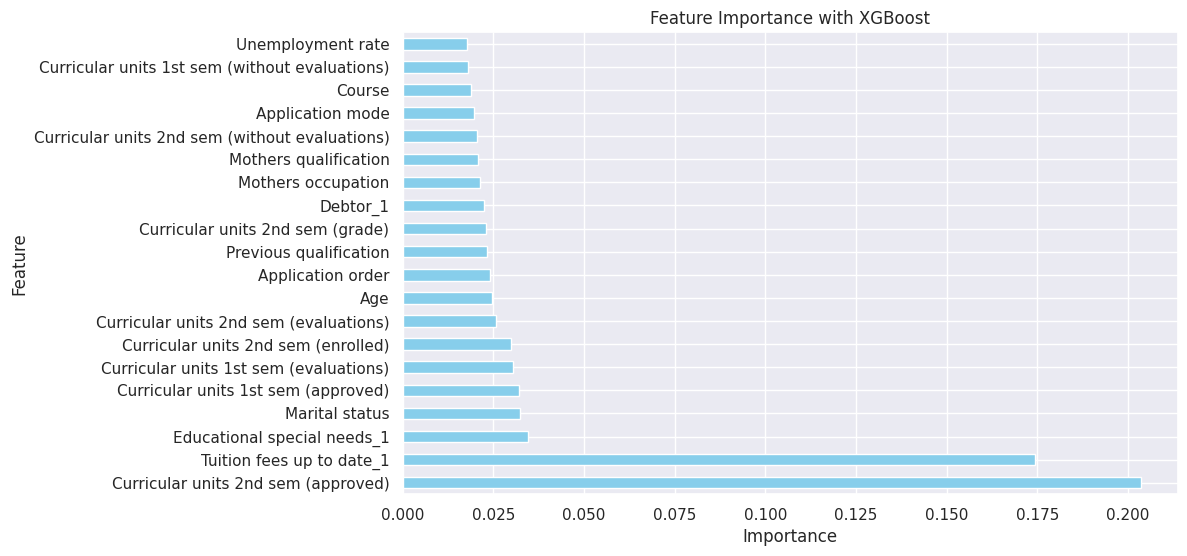

Características más importantes para XGBoost: ['Curricular units 2nd sem (approved)', 'Tuition fees up to date_1', 'Educational special needs_1', 'Marital status', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Age']
Tamaño de X_train_reduced_xgb: (2167, 9)
Tamaño de X_test_reduced_xgb: (929, 9)
Parámetros cargados desde el archivo:
{'learning_rate': 0.09605659500141947, 'max_depth': 7, 'subsample': 0.8823372977591352, 'colsample_bytree': 0.9485701633265352, 'scale_pos_weight': 6.357753421418753, 'min_child_weight': 4, 'gamma': 0.8109844715461183}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[18:15:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.




Reporte de clasificación para XGBoost:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       298
           1       0.59      0.40      0.48       167
           2       0.78      0.93      0.85       464

    accuracy                           0.78       929
   macro avg       0.74      0.69      0.71       929
weighted avg       0.77      0.78      0.77       929

F1 Score ponderado: 0.7654462243815201


In [47]:
# Entrenar el modelo XGBoost con los datos balanceados (SMOTE + ENN) sin escalar
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_smote_enn, y_smote_enn)

# Extraer la importancia de las características con XGBoost
feature_importances_xgb = {name: score for name, score in zip(X_train.columns, xgb_model.feature_importances_)}
feature_importances_sorted_xgb = pd.Series(feature_importances_xgb).sort_values(ascending=False)

# Lista con el orden de importancia de las características
ordered_feature_importance = feature_importances_sorted_xgb.index.tolist()

# Imprimir la lista de características con sus respectivas importancias ordenadas
print("Características ordenadas por importancia:")
for feature, importance in feature_importances_sorted_xgb.items():
    print(f"{feature}: {importance:.4f}")

# Graficar la importancia de las características de XGBoost
def plot_feature_importance_xgb(importance, model_name, X_train):
    features = X_train.columns  # Asumiendo que X_train es un DataFrame
    feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    feature_importance.head(20).plot(kind='barh', color='skyblue')  # Mostrar las top 20 características
    plt.title(f'Feature Importance with {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Graficar la importancia de las características de XGBoost
plot_feature_importance_xgb(xgb_model.feature_importances_, 'XGBoost', X_train)

# Seleccionar las 9 características más importantes
columns_xgb = list(feature_importances_sorted_xgb.head(9).index)
print("Características más importantes para XGBoost:", columns_xgb)

# Reducir los conjuntos de entrenamiento, validación y prueba a las características seleccionadas
X_train_reduced_xgb = X_train[columns_xgb].copy()
X_test_reduced_xgb = X_test[columns_xgb].copy()

# Verificar el tamaño de los conjuntos después de la reducción de características
print(f"Tamaño de X_train_reduced_xgb: {X_train_reduced_xgb.shape}")
print(f"Tamaño de X_test_reduced_xgb: {X_test_reduced_xgb.shape}")

'''# Definir el espacio de búsqueda de hiperparámetros para XGBoost con Optuna
def objective(trial):
    # Espacio de búsqueda de hiperparámetros
    param = {
        'objective': 'multi:softmax',  # Multi-class classification
        'num_class': 3,  # Número de clases
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
        'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10),  # Ajuste de peso para clases desbalanceadas
        'n_estimators': 100,  # Número de árboles (si el learning rate es bajo, podría necesitar más árboles)
        'eval_metric': 'mlogloss',  # Evaluación de logaritmo de la pérdida
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  # Regularización para evitar sobreajuste
        'gamma': trial.suggest_uniform('gamma', 0, 1),  # Penaliza la creación de nuevos nodos
        'early_stopping_rounds': 10,  # Stop early si no mejora después de 10 iteraciones
    }

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_reduced_xgb, y_train, eval_set=[(X_test_reduced_xgb, y_test)], verbose=False)

    y_pred = model.predict(X_test_reduced_xgb)

    # Calcular f1-score ponderado
    f1 = f1_score(y_test, y_pred, average='weighted')

    return f1  # Devolver f1-score para que Optuna lo maximice

# Optuna para optimizar los hiperparámetros
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Guardar los mejores parámetros encontrados
best_params = study.best_params

# Guardar los parámetros en un archivo .json
file_path = "best_xgb_params.json"
with open(file_path, 'w') as json_file:
    json.dump(best_params, json_file, indent=4)

print(f"Mejores parámetros guardados en {file_path}")'''

# Ruta al archivo JSON en Colab
file_path_xgb = '/content/best_xgb_params.json'

# Cargar los mejores parámetros desde el archivo .json
with open(file_path_xgb, 'r') as json_file:
    loaded_params_xgb = json.load(json_file)

# Imprimir los parámetros cargados para verificar
print("Parámetros cargados desde el archivo:")
print(loaded_params_xgb)

# Crear el modelo XGBoost con los parámetros cargados
xgb_model_best = xgb.XGBClassifier(**loaded_params_xgb)

# Entrenar el modelo con los datos de entrenamiento reducidos (con los mejores parámetros)
xgb_model_best.fit(X_train_reduced_xgb, y_train)

# Hacer predicciones con el modelo entrenado
y_pred_xgb = xgb_model_best.predict(X_test_reduced_xgb)

# Generar el reporte de clasificación
report_xgb = classification_report(y_test, y_pred_xgb)
print("Reporte de clasificación para XGBoost:\n", report_xgb)

# Calcular la métrica F1 score general (promedio ponderado)
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

# Mostrar el reporte de clasificación
print(f"F1 Score ponderado: {f1}")

# Generar la matriz de confusión
xgb_cm = confusion_matrix(y_test, y_pred_xgb)

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, model_name, labels):
    fig = go.Figure(data=go.Heatmap(
        z=cm,  # Valores de la matriz de confusión
        x=labels,  # Etiquetas de las columnas (predicciones)
        y=labels,  # Etiquetas de las filas (verdaderos)
        colorscale='Viridis',  # Paleta de colores
        showscale=True,  # Mostrar la barra de escala
        text=cm,  # Colocar los números dentro de cada celda
        texttemplate='%{text}',  # Mostrar los valores directamente
        colorbar=dict(title="Count")  # Título de la barra de colores
    ))

    # Actualizar la configuración de la figura
    fig.update_layout(
        title=f'Confusion Matrix for {model_name}',
        xaxis_title='Predicted Label',
        yaxis_title='True Label',
        xaxis=dict(tickmode='array', tickvals=list(range(len(labels))), ticktext=labels),
        yaxis=dict(tickmode='array', tickvals=list(range(len(labels))), ticktext=labels),
        autosize=False,
        width=600,
        height=600
    )
    fig.show()

# Etiquetas de las clases
labels = ['Dropout', 'Enrolled', 'Graduate']

# Graficar la matriz de confusión para XGBoost
plot_confusion_matrix(xgb_cm, 'XGBoost', labels)

In [48]:
print("Características seleccionadas para entrenamiento:", columns_xgb)

Características seleccionadas para entrenamiento: ['Curricular units 2nd sem (approved)', 'Tuition fees up to date_1', 'Educational special needs_1', 'Marital status', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Age']


In [49]:
# Calcular la matriz de confusión con porcentajes y redondear a una décima
xgb_cm_percentage = (xgb_cm.astype('float') / xgb_cm.sum(axis=1)[:, np.newaxis] * 100)
xgb_cm_percentage = np.round(xgb_cm_percentage, 1)  # Redondear a una decimal

# Función para graficar la matriz de confusión con porcentajes
def plot_confusion_matrix_percentage(cm, model_name, labels):
    fig = go.Figure(data=go.Heatmap(
        z=cm,  # Valores de la matriz de confusión (porcentajes)
        x=labels,  # Etiquetas de las columnas (predicciones)
        y=labels,  # Etiquetas de las filas (verdaderos)
        colorscale='Viridis',  # Paleta de colores
        showscale=True,  # Mostrar la barra de escala
        text=cm,  # Colocar los números dentro de cada celda
        texttemplate='%{text}%',  # Mostrar los valores como porcentajes
        colorbar=dict(title="Percentage")  # Título de la barra de colores
    ))

    # Actualizar la configuración de la figura
    fig.update_layout(
        title=f'Confusion Matrix for {model_name} (Percentage)',
        xaxis_title='Predicted Label',
        yaxis_title='True Label',
        xaxis=dict(tickmode='array', tickvals=list(range(len(labels))), ticktext=labels),
        yaxis=dict(tickmode='array', tickvals=list(range(len(labels))), ticktext=labels),
        autosize=False,
        width=600,
        height=600
    )
    fig.show()

# Etiquetas de las clases
labels = ['Dropout', 'Enrolled', 'Graduate']

# Graficar la matriz de confusión con porcentajes redondeados para XGBoost
plot_confusion_matrix_percentage(xgb_cm_percentage, 'XGBoost', labels)

# **SVM**

In [50]:
#Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)  # Normalizar el conjunto de validación

# Convertir de nuevo a DataFrame para facilitar el acceso a las columnas después de la normalización
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)

In [51]:
#Aplicar SMOTE ENN para SVM en datos normalizados
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

# Verificar la distribución de clases después de SMOTE
print("Distribución de clases después de SMOTE:")
print(pd.Series(y_smote).value_counts())

# Aplicar ENN sobre los datos balanceados por SMOTE
enn = EditedNearestNeighbours()
X_smote_enn, y_smote_enn = enn.fit_resample(X_smote, y_smote)

# Verificar la distribución de clases después de ENN
print("Distribución de clases después de SMOTE + ENN:")
print(pd.Series(y_smote_enn).value_counts())

Distribución de clases después de SMOTE:
1    1082
0    1082
2    1082
Name: count, dtype: int64
Distribución de clases después de SMOTE + ENN:
0    1082
1     828
2     431
Name: count, dtype: int64


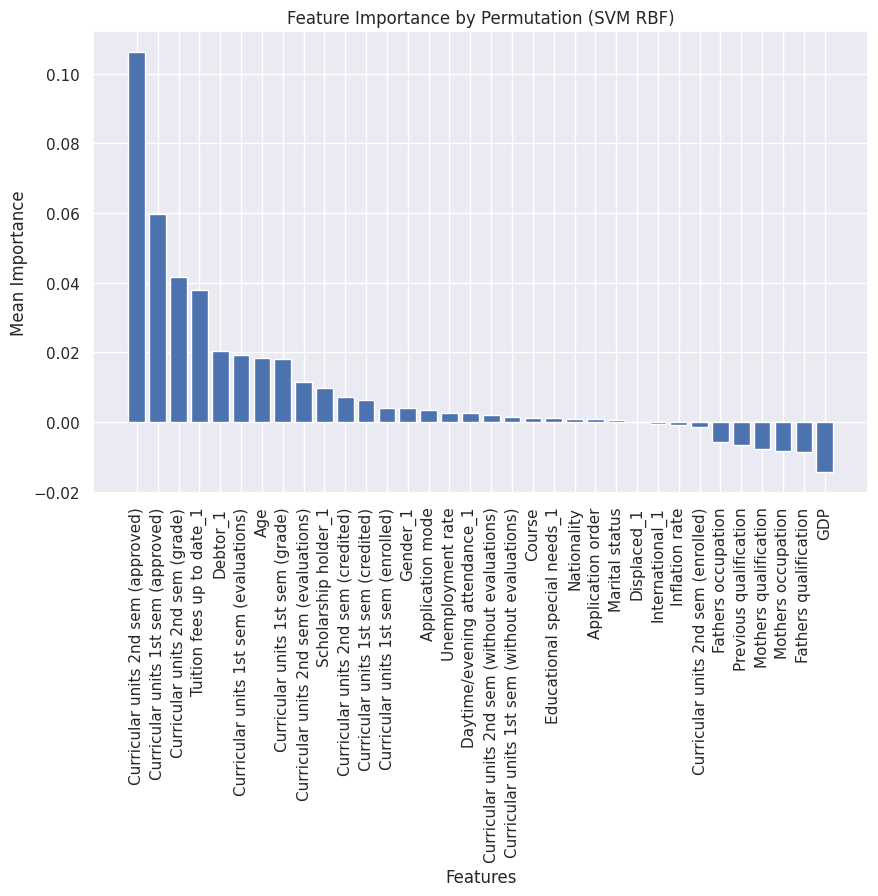

Características más importantes para SVM (por permutación):
Curricular units 2nd sem (approved)               0.106136
Curricular units 1st sem (approved)               0.059634
Curricular units 2nd sem (grade)                  0.041765
Tuition fees up to date_1                         0.037890
Debtor_1                                          0.020452
Curricular units 1st sem (evaluations)            0.019160
Age                                               0.018299
Curricular units 1st sem (grade)                  0.018084
Curricular units 2nd sem (evaluations)            0.011410
Scholarship holder_1                              0.009688
Curricular units 2nd sem (credited)               0.007320
Curricular units 1st sem (credited)               0.006243
Curricular units 1st sem (enrolled)               0.004090
Gender_1                                          0.004090
Application mode                                  0.003445
Unemployment rate                                 0.002

In [52]:
#Entrenar el modelo SVM con los datos balanceados por SMOTE + Tomek + ENN
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_smote_enn, y_smote_enn)

# Calcular la importancia de las características por permutación
results = permutation_importance(svm_model, X_test_scaled, y_test, scoring='accuracy')

# Ordenar las características de mayor a menor importancia
importances_mean = results.importances_mean
sorted_idx = np.argsort(importances_mean)[::-1]

# Si los datos son DataFrame, puedes obtener los nombres de las columnas correctamente
if isinstance(X_test_scaled, pd.DataFrame):
    sorted_features = X_test_scaled.columns[sorted_idx]
else:
    # Si X_test_scaled es un array de NumPy, asigna nombres de características genéricos
    sorted_features = ['Feature_' + str(i) for i in sorted_idx]

# Crear un gráfico con los resultados de la importancia de características
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, importances_mean[sorted_idx])
plt.xticks(rotation=90)
plt.title('Feature Importance by Permutation (SVM RBF)')
plt.xlabel('Features')
plt.ylabel('Mean Importance')
plt.show()

# Extraer la importancia de las características
feature_importances_svm = {name: score for name, score in zip(X_train_scaled.columns, results.importances_mean)}
feature_importances_sorted_svm = pd.Series(feature_importances_svm).sort_values(ascending=False)

# Seleccionar las 20 características más importantes
top_20_features_svm = feature_importances_sorted_svm.head(20)
print("Características más importantes para SVM (por permutación):")
print(top_20_features_svm)

# Reducir el conjunto de datos a las 20 características más importantes
columns_svm = top_20_features_svm.index
X_train_reduced_svm = X_train_scaled[columns_svm].copy()
X_test_reduced_svm = X_test_scaled[columns_svm].copy()

# Verificar el tamaño de los conjuntos después de la reducción de características
print(f"Tamaño de X_train_reduced_svm: {X_train_reduced_svm.shape}")
print(f"Tamaño de X_test_reduced_svm: {X_test_reduced_svm.shape}")

'''#Búsqueda de hiperparámetros para SVM
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': ['balanced', None],
}

# Crear el modelo GridSearchCV con validación cruzada (cv=10)
grid_search_svm = GridSearchCV(SVC(), param_grid, cv=10, n_jobs=-1, verbose=2)

# Ajustar el modelo a los datos de entrenamiento escalados
grid_search_svm.fit(X_train_reduced_svm, y_train)

# Imprimir los mejores parámetros
print("Mejores parámetros para SVM:", grid_search_svm.best_params_)

#Guardar los mejores parámetros en un archivo .json
best_params = grid_search_svm.best_params_'''

# Cargar los parámetros guardados desde el archivo JSON
with open('/content/best_params_svm.json', 'r') as f:
    loaded_params_svm = json.load(f)

# Imprimir los mejores parámetros
print("Mejores parámetros para el modelo SVM:")
print(loaded_params_svm)

# Ruta al archivo JSON en Colab
file_path_svm = '/content/best_params_svm.json'

# Cargar los mejores parámetros desde el archivo .json
with open(file_path_svm, 'r') as json_file:
    loaded_params_svm = json.load(json_file)

# Imprimir los parámetros cargados para verificar
print("Parámetros cargados desde el archivo:")
print(loaded_params_svm)

# Usar los mejores parámetros cargados para crear el modelo SVM
svm_model_best = SVC(**loaded_params_svm)

# Entrenar el modelo con los datos de entrenamiento
svm_model_best.fit(X_train_reduced_svm, y_train)

#Hacer predicciones con el modelo entrenado
y_pred_svm = svm_model_best.predict(X_test_reduced_svm)

#Generar el reporte de clasificación
report_svm = classification_report(y_test, y_pred_svm)
print("Reporte de clasificación para SVM:\n", report_svm)

#Calcular la métrica F1 score general (promedio ponderado)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Mostrar la métrica F1 score ponderado
print(f"F1-score ponderado para SVM: {f1_svm}")

#Generar la matriz de confusión para el modelo SVM
svm_cm = confusion_matrix(y_test, y_pred_svm)

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, model_name, labels):
    fig = go.Figure(data=go.Heatmap(
        z=cm,  # Valores de la matriz de confusión
        x=labels,  # Etiquetas de las columnas (predicciones)
        y=labels,  # Etiquetas de las filas (verdaderos)
        colorscale='Viridis',  # Paleta de colores
        showscale=True,  # Mostrar la barra de escala
        text=cm,  # Colocar los números dentro de cada celda
        texttemplate='%{text}',  # Mostrar los valores directamente
        colorbar=dict(title="Count")  # Título de la barra de colores
    ))

    # Actualizar la configuración de la figura
    fig.update_layout(
        title=f'Confusion Matrix for {model_name}',
        xaxis_title='Predicted Label',
        yaxis_title='True Label',
        xaxis=dict(tickmode='array', tickvals=list(range(len(labels))), ticktext=labels),
        yaxis=dict(tickmode='array', tickvals=list(range(len(labels))), ticktext=labels),
        autosize=False,
        width=600,
        height=600
    )
    fig.show()

# Etiquetas de las clases
labels = ['Dropout', 'Enrolled', 'Graduate']

# Graficar la matriz de confusión para el modelo SVM
plot_confusion_matrix(svm_cm, 'SVM RBF', labels)

In [53]:
print("Características seleccionadas para entrenamiento:", top_20_features_svm)

Características seleccionadas para entrenamiento: Curricular units 2nd sem (approved)               0.106136
Curricular units 1st sem (approved)               0.059634
Curricular units 2nd sem (grade)                  0.041765
Tuition fees up to date_1                         0.037890
Debtor_1                                          0.020452
Curricular units 1st sem (evaluations)            0.019160
Age                                               0.018299
Curricular units 1st sem (grade)                  0.018084
Curricular units 2nd sem (evaluations)            0.011410
Scholarship holder_1                              0.009688
Curricular units 2nd sem (credited)               0.007320
Curricular units 1st sem (credited)               0.006243
Curricular units 1st sem (enrolled)               0.004090
Gender_1                                          0.004090
Application mode                                  0.003445
Unemployment rate                                 0.002583
Daytim

In [54]:
# Calcular la matriz de confusión con porcentajes y redondear a una décima
svm_cm_percentage = (svm_cm.astype('float') / svm_cm.sum(axis=1)[:, np.newaxis] * 100)
svm_cm_percentage = np.round(svm_cm_percentage, 1)  # Redondear a una decimal

# Función para graficar la matriz de confusión con porcentajes
def plot_confusion_matrix_percentage(cm, model_name, labels):
    fig = go.Figure(data=go.Heatmap(
        z=cm,  # Valores de la matriz de confusión (porcentajes)
        x=labels,  # Etiquetas de las columnas (predicciones)
        y=labels,  # Etiquetas de las filas (verdaderos)
        colorscale='Viridis',  # Paleta de colores
        showscale=True,  # Mostrar la barra de escala
        text=cm,  # Colocar los números dentro de cada celda
        texttemplate='%{text}%',  # Mostrar los valores como porcentajes
        colorbar=dict(title="Percentage")  # Título de la barra de colores
    ))

    # Actualizar la configuración de la figura
    fig.update_layout(
        title=f'Confusion Matrix for {model_name} (Percentage)',
        xaxis_title='Predicted Label',
        yaxis_title='True Label',
        xaxis=dict(tickmode='array', tickvals=list(range(len(labels))), ticktext=labels),
        yaxis=dict(tickmode='array', tickvals=list(range(len(labels))), ticktext=labels),
        autosize=False,
        width=600,
        height=600
    )
    fig.show()

# Etiquetas de las clases
labels = ['Dropout', 'Enrolled', 'Graduate']

# Graficar la matriz de confusión con porcentajes redondeados para SVM
plot_confusion_matrix_percentage(svm_cm_percentage, 'SVM', labels)

In [59]:
# Convertir a listas antes de guardar
features_dict_svm = {"selected_features": top_20_features_svm.tolist()}
features_dict_rf = {"selected_features": columns}
features_dict_xgb = {"selected_features": columns_xgb}

In [60]:
# Guardar el diccionario de SVM
with open("features_svm.json", "w") as json_file:
    json.dump(features_dict_svm, json_file)

# Guardar el diccionario de Random Forest
with open("features_rf.json", "w") as json_file:
    json.dump(features_dict_rf, json_file)

# Guardar el diccionario de XGBoost
with open("features_xgb.json", "w") as json_file:
    json.dump(features_dict_xgb, json_file)

print("Diccionarios de características guardados exitosamente.")

Diccionarios de características guardados exitosamente.


In [61]:
# Guardar los modelos como archivos .pkl
joblib.dump(rf_model_best, "model_rf.pkl")
joblib.dump(svm_model_best, "model_svm.pkl")
joblib.dump(xgb_model_best, "model_xgb.pkl")

print("Modelos guardados exitosamente.")

Modelos guardados exitosamente.
